# **Data Exploration Analysis**

## **Importing Required Libraries**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Loading the dataset**

In [15]:
df = pd.read_csv('/workspaces/Bangladesh-Real-State-Price-Prediction/data/raw/house_price_bd.csv')

## **Basic Dataset Information**

In [16]:
df.head()

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location
0,We Are Offering You A Very Spacious 1960 Sq Ft...,3.0,4.0,3,vacant,1960.0,dhaka,"৳39,000,000","Gulshan 1, Gulshan"
1,Valuable 1705 Square Feet Apartment Is Ready T...,3.0,3.0,1,vacant,1705.0,dhaka,"৳16,900,000","Lake Circus Road, Kalabagan"
2,1370 square feet apartment is ready to sale in...,3.0,3.0,6,vacant,1370.0,dhaka,"৳12,500,000","Shukrabad, Dhanmondi"
3,2125 Square Feet Apartment For Sale In Bashund...,3.0,3.0,4,vacant,2125.0,dhaka,"৳20,000,000","Block L, Bashundhara R-A"
4,Buy This 2687 Square Feet Flat In The Nice Are...,3.0,3.0,4,vacant,2687.0,dhaka,"৳47,500,000","Road No 25, Banani"


In [17]:
df.shape

(3865, 9)

In [18]:
df.describe()

,Bedrooms,Bathrooms,Floor_area
count,2864.000000,2864.000000,3766.000000
mean,3.133031,2.992668,1940.299522
std,2.215457,0.978434,6024.921935
min,1.000000,1.000000,84.000000
25%,3.000000,3.000000,1100.000000
50%,3.000000,3.000000,1380.000000
75%,3.000000,3.000000,1860.000000
max,50.000000,10.000000,195840.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             3865 non-null   object 
 1   Bedrooms          2864 non-null   float64
 2   Bathrooms         2864 non-null   float64
 3   Floor_no          3181 non-null   object 
 4   Occupancy_status  3766 non-null   object 
 5   Floor_area        3766 non-null   float64
 6   City              3865 non-null   object 
 7   Price_in_taka     3865 non-null   object 
 8   Location          3859 non-null   object 
dtypes: float64(3), object(6)
memory usage: 271.9+ KB


In [20]:
df.isnull().sum()

Title                  0
Bedrooms            1001
Bathrooms           1001
Floor_no             684
Occupancy_status      99
Floor_area            99
City                   0
Price_in_taka          0
Location               6
dtype: int64

## **Data Types and Unique Values**

In [21]:
categorical_columns = ['City', 'Location', 'Occupancy_status']
for col in categorical_columns:
    print(f"Unique values in '{col}':")
    print(df[col].value_counts())
    print("\n")

Unique values in 'City':
City
dhaka               1650
chattogram          1470
narayanganj-city     420
gazipur              180
cumilla              145
Name: count, dtype: int64


Unique values in 'Location':
Location
Rupganj, Narayanganj                              411
Dewan Bazar, Bakalia                               98
Dhaka Trunk Road, 9 No. North Pahartali Ward       92
Joydebpur, Gazipur Sadar Upazila                   66
Tongi, Gazipur Sadar Upazila                       57
                                                 ... 
Bayazid Abasic Elaka Road, Bayazid                  1
Chandara, Gazipur Sadar Upazila                     1
Chowrasta, Chandra                                  1
Maleker Bari Bazar Road, Gazipur Sadar Upazila      1
Bason, Gazipur Sadar Upazila                        1
Name: count, Length: 505, dtype: int64


Unique values in 'Occupancy_status':
Occupancy_status
vacant      3763
occupied       3
Name: count, dtype: int64




## **Data Cleaning Overview**

In [22]:
print("Values in 'Price_in_taka' before cleaning:")
print(df['Price_in_taka'].head())

Values in 'Price_in_taka' before cleaning:
0    ৳39,000,000
1    ৳16,900,000
2    ৳12,500,000
3    ৳20,000,000
4    ৳47,500,000
Name: Price_in_taka, dtype: object


## **Exploratory Data Analysis**

### **Distribution of Target Variable (Price_in_taka)**

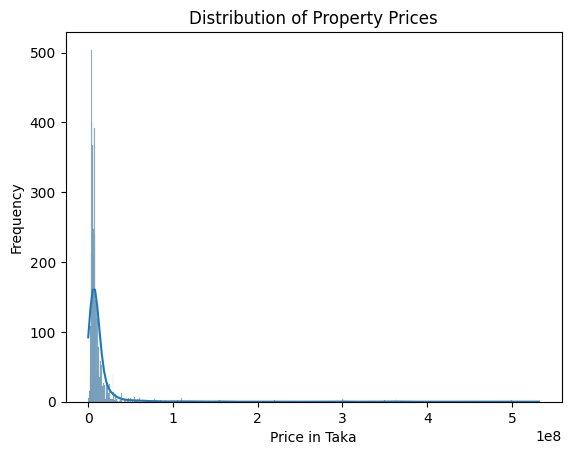

In [23]:
df['Price_in_taka'] = df['Price_in_taka'].astype(str)
df['Price_in_taka'] = df['Price_in_taka'].str.replace('৳', '', regex=False).str.replace(',', '', regex=False).astype(float)
sns.histplot(df['Price_in_taka'], kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price in Taka')
plt.ylabel('Frequency')
plt.savefig('/workspaces/Bangladesh-Real-State-Price-Prediction/reports/figures/Distribution_of_Target_Variable_Price_in_taka.png')
plt.show()

### **Distribution of Numerical Features**

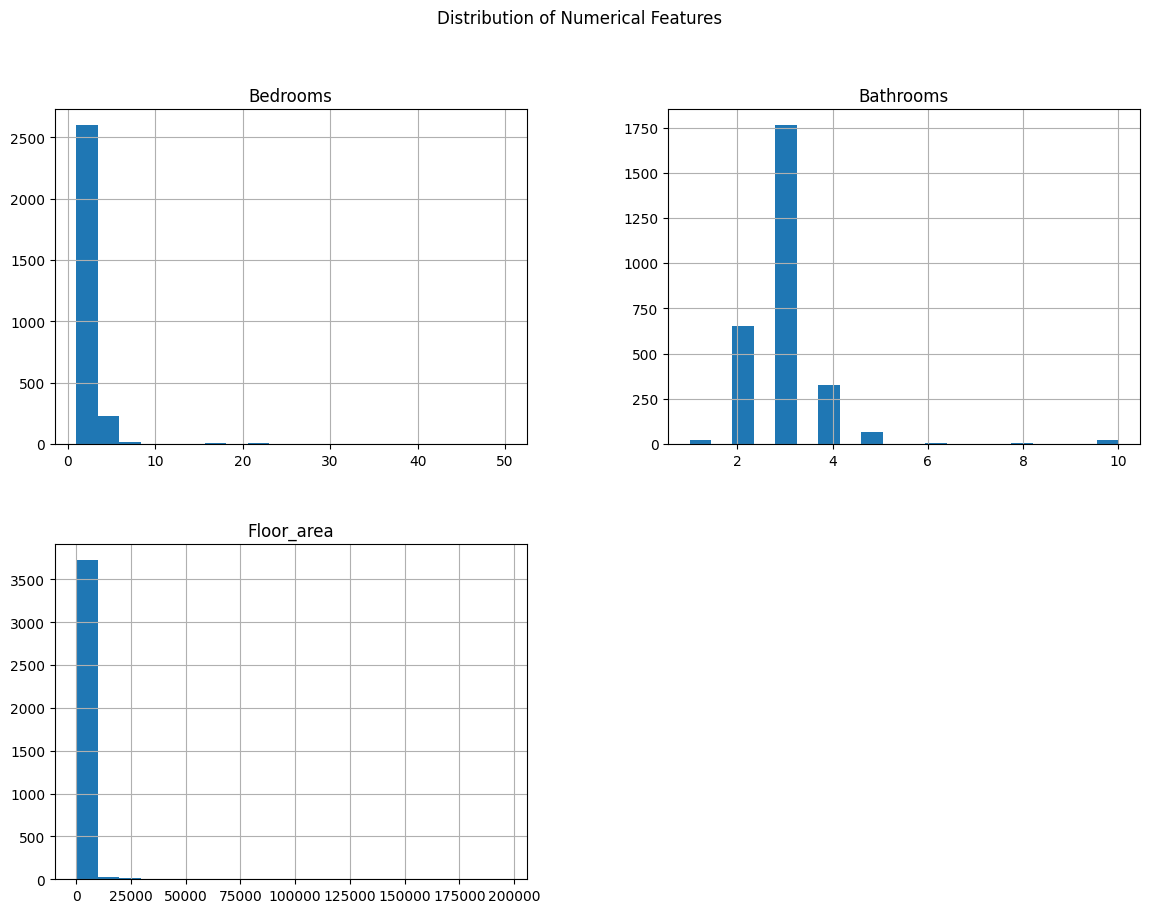

In [24]:
numerical_columns = ['Bedrooms', 'Bathrooms', 'Floor_no', 'Floor_area']
df[numerical_columns].hist(bins=20, figsize=(14, 10), layout=(2, 2))
plt.suptitle('Distribution of Numerical Features')
plt.savefig('/workspaces/Bangladesh-Real-State-Price-Prediction/reports/figures/Distribution of Numerical Features.png')
plt.show()

### **Price Distribution by City**

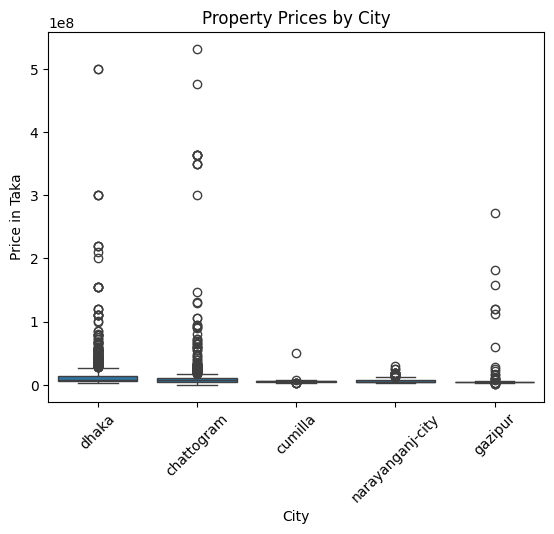

In [25]:
sns.boxplot(x='City', y='Price_in_taka', data=df)
plt.title('Property Prices by City')
plt.xlabel('City')
plt.ylabel('Price in Taka')
plt.xticks(rotation=45)
plt.savefig('/workspaces/Bangladesh-Real-State-Price-Prediction/reports/figures/Price Distribution by City.png')
plt.show()

### **Price vs. Floor Area**

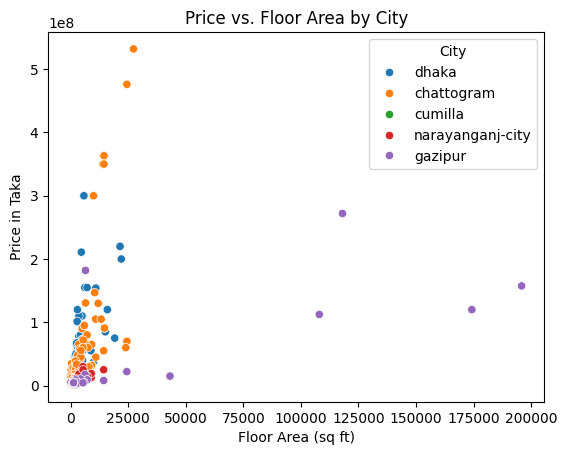

In [26]:
sns.scatterplot(x='Floor_area', y='Price_in_taka', hue='City', data=df)
plt.title('Price vs. Floor Area by City')
plt.xlabel('Floor Area (sq ft)')
plt.ylabel('Price in Taka')
plt.savefig('/workspaces/Bangladesh-Real-State-Price-Prediction/reports/figures/Price vs. Floor Area.png')
plt.show()

### **Price Distribution by Number of Bedrooms**

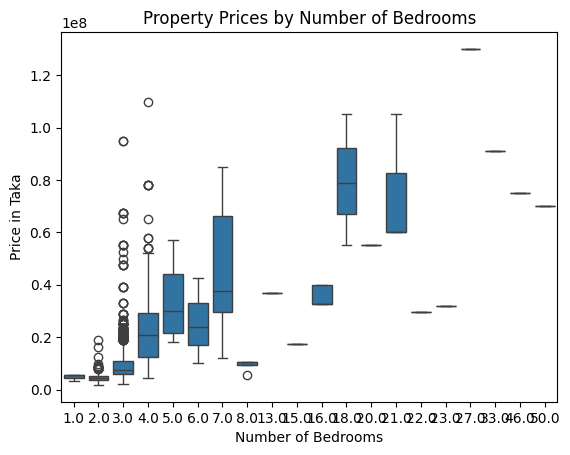

In [27]:
sns.boxplot(x='Bedrooms', y='Price_in_taka', data=df)
plt.title('Property Prices by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price in Taka')
plt.savefig('/workspaces/Bangladesh-Real-State-Price-Prediction/reports/figures/Price Distribution by Number of Bedrooms.png')
plt.show()